In [23]:
import pandas as pd
import numpy as np
import re

import seaborn as sns
import matplotlib.pyplot as plt

plt.rc("figure",figsize=(16, 9))

cadf = pd.read_csv('./CA_2013_onwards.csv', encoding='utf-8', index_col=False)
cadf

,id,state,stop_date,stop_time,location_raw,county_name,county_fips,fine_grained_location,police_department,driver_gender,...,driver_race,violation_raw,violation,search_conducted,search_type_raw,search_type,contraband_found,stop_outcome,is_arrested,ethnicity
0,CA-2013-0000001,CA,2013-01-01,NaN,San Diego,San Diego County,6073.0,NaN,NaN,M,...,Hispanic,Mechanical or Nonmoving Violation (VC),Equipment,False,No Search,NaN,False,CHP 215,False,H
1,CA-2013-0000002,CA,2013-01-01,NaN,San Diego,San Diego County,6073.0,NaN,NaN,F,...,Black,Moving Violation (VC),Moving violation,False,No Search,NaN,False,CHP 215,False,B
2,CA-2013-0000003,CA,2013-01-01,NaN,San Diego,San Diego County,6073.0,NaN,NaN,M,...,White,Moving Violation (VC),Moving violation,False,No Search,NaN,False,CHP 215,False,W
3,CA-2013-0000004,CA,2013-01-01,NaN,San Diego,San Diego County,6073.0,NaN,NaN,M,...,White,Mechanical or Nonmoving Violation (VC),Equipment,False,No Search,NaN,False,CHP 215,False,W
4,CA-2013-0000005,CA,2013-01-01,NaN,San Diego,San Diego County,6073.0,NaN,NaN,M,...,Black,Mechanical or Nonmoving Violation (VC),Equipment,False,No Search,NaN,False,CHP 215,False,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14536333,CA-2016-1919887,CA,2016-06-30,NaN,Oakhurst,Madera County,6039.0,NaN,NaN,M,...,White,Moving Violation (VC),Moving violation,False,No Search,NaN,False,Verbal Warning,False,W
14536334,CA-2016-1919888,CA,2016-06-30,NaN,Oakhurst,Madera County,6039.0,NaN,NaN,M,...,Asian,Moving Violation (VC),Moving violation,False,No Search,NaN,False,Verbal Warning,False,A
14536335,CA-2016-1919889,CA,2016-06-30,NaN,Oakhurst,Madera County,6039.0,NaN,NaN,F,...,Hispanic,Moving Violation (VC),Moving violation,False,No Search,NaN,False,Verbal Warning,False,H
14536336,CA-2016-1919890,CA,2016-06-30,NaN,Oakhurst,Madera County,6039.0,NaN,NaN,M,...,White,Moving Violation (VC),Moving violation,False,No Search,NaN,False,Verbal Warning,False,W


In [24]:
cadf['stop_date'] = pd.to_datetime(cadf['stop_date'])
cadf['year'] = cadf['stop_date'].dt.year
cadf['month'] = cadf['stop_date'].dt.month
cadf['day'] = cadf['stop_date'].dt.day
del cadf['county_fips']
del cadf['fine_grained_location']
del cadf['police_department']
del cadf['driver_age']
del cadf['search_type']
del cadf['contraband_found']
del cadf['stop_time']
del cadf['ethnicity']
del cadf['location_raw']
cadf['stop_count']= 1
cadf.isnull().sum()

id                        0
state                     0
stop_date                 0
county_name         1076319
driver_gender             0
driver_age_raw            0
driver_race_raw           0
driver_race               0
violation_raw             0
violation                 0
search_conducted          0
search_type_raw           0
stop_outcome              0
is_arrested               0
year                      0
month                     0
day                       0
stop_count                0
dtype: int64

In [25]:
#統計['is_arrested']==True和['search_conductes']==False的數量
cadf[(cadf['is_arrested']==True) & (cadf['search_conducted']==False)].shape[0]


64149

In [26]:
# 年紀分析

cadf['driver_age_raw'].value_counts()

# 計算各年齡層的 search 和 arrest 比例
age = cadf.groupby(['driver_age_raw']).agg({'search_conducted': 'sum','is_arrested':'sum' ,'stop_count': 'sum'}).reset_index()
age['search_rate'] = age['search_conducted']/age['stop_count']
age['arrest_rate'] = age['is_arrested']/age['stop_count']
# 調整rate的格式
age['search_rate'] = age['search_rate'].apply(lambda x: format(x, '.2%'))
age['arrest_rate'] = age['arrest_rate'].apply(lambda x: format(x, '.2%'))
age


,driver_age_raw,search_conducted,is_arrested,stop_count,search_rate,arrest_rate
0,0-14,894,2653,24743,3.61%,10.72%
1,15-25,117761,88295,2423934,4.86%,3.64%
2,25-32,153598,116989,3437799,4.47%,3.40%
3,33-39,81727,61353,2721297,3.00%,2.25%
4,40-48,62276,47594,2698382,2.31%,1.76%
5,49+,62471,49884,3230183,1.93%,1.54%


In [27]:
# 月分分析
# 計算每個月的 count總數 以及 search 和 arrest 比例
month = cadf.groupby(['month']).agg({'search_conducted': 'sum','is_arrested':'sum' ,'stop_count': 'sum'}).reset_index()
month['search_rate'] = month['search_conducted']/month['stop_count']
month['arrest_rate'] = month['is_arrested']/month['stop_count']
# # 調整rate的格式
# month['search_rate'] = month['search_rate'].apply(lambda x: format(x, '.2%'))
# month['arrest_rate'] = month['arrest_rate'].apply(lambda x: format(x, '.2%'))
month




,month,search_conducted,is_arrested,stop_count,search_rate,arrest_rate
0,1,46068,34616,1436738,0.032064,0.024093
1,2,43179,32651,1304988,0.033088,0.025020
2,3,46616,35502,1433900,0.032510,0.024759
3,4,45048,34135,1396220,0.032264,0.024448
4,5,48117,37009,1437461,0.033474,0.025746
5,6,44476,34460,1345696,0.033051,0.025608
6,7,37338,29358,1134911,0.032899,0.025868
7,8,38486,30533,1111772,0.034617,0.027463
8,9,33574,25515,1031696,0.032543,0.024731
9,10,34052,25950,1025229,0.033214,0.025311


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


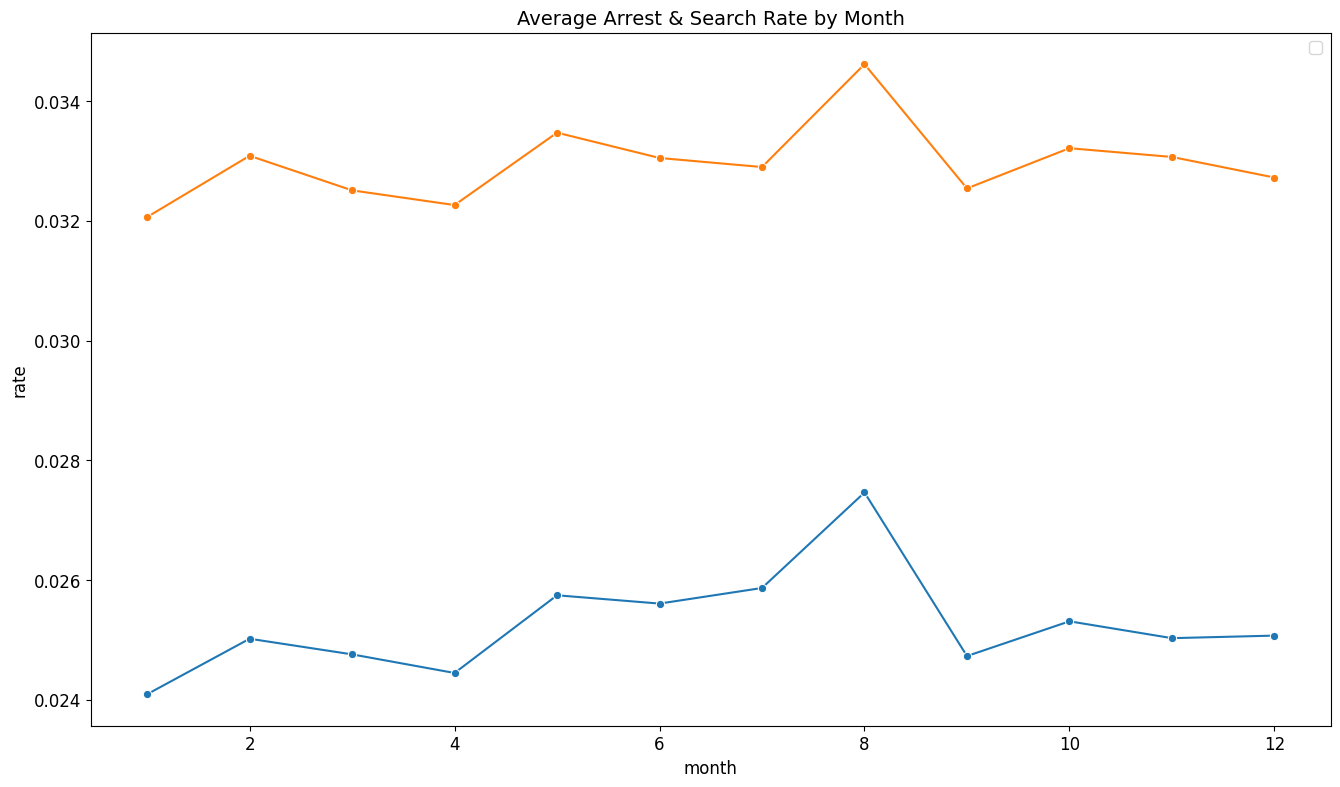

In [28]:
#把month畫成折線圖，x軸是month，y軸是arrest_rate
month_arrest = month[['month','arrest_rate']]
sns.lineplot(data = month_arrest, x='month',y='arrest_rate', marker='o')
month_search = month[['month','search_rate']]
sns.lineplot(data = month_search, x='month',y='search_rate', marker='o')
plt.title('Average Arrest & Search Rate by Month',fontsize = 14)
plt.xlabel('month', fontsize=12)
plt.ylabel('rate', fontsize=12)
# 調整字體大小
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
# 調整圖例
plt.legend(fontsize=12)

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5]),
 [Text(0, 0.5, '1'),
  Text(0, 1.5, '2'),
  Text(0, 2.5, '3'),
  Text(0, 3.5, '4'),
  Text(0, 4.5, '5'),
  Text(0, 5.5, '6'),
  Text(0, 6.5, '7'),
  Text(0, 7.5, '8'),
  Text(0, 8.5, '9'),
  Text(0, 9.5, '10'),
  Text(0, 10.5, '11'),
  Text(0, 11.5, '12')])

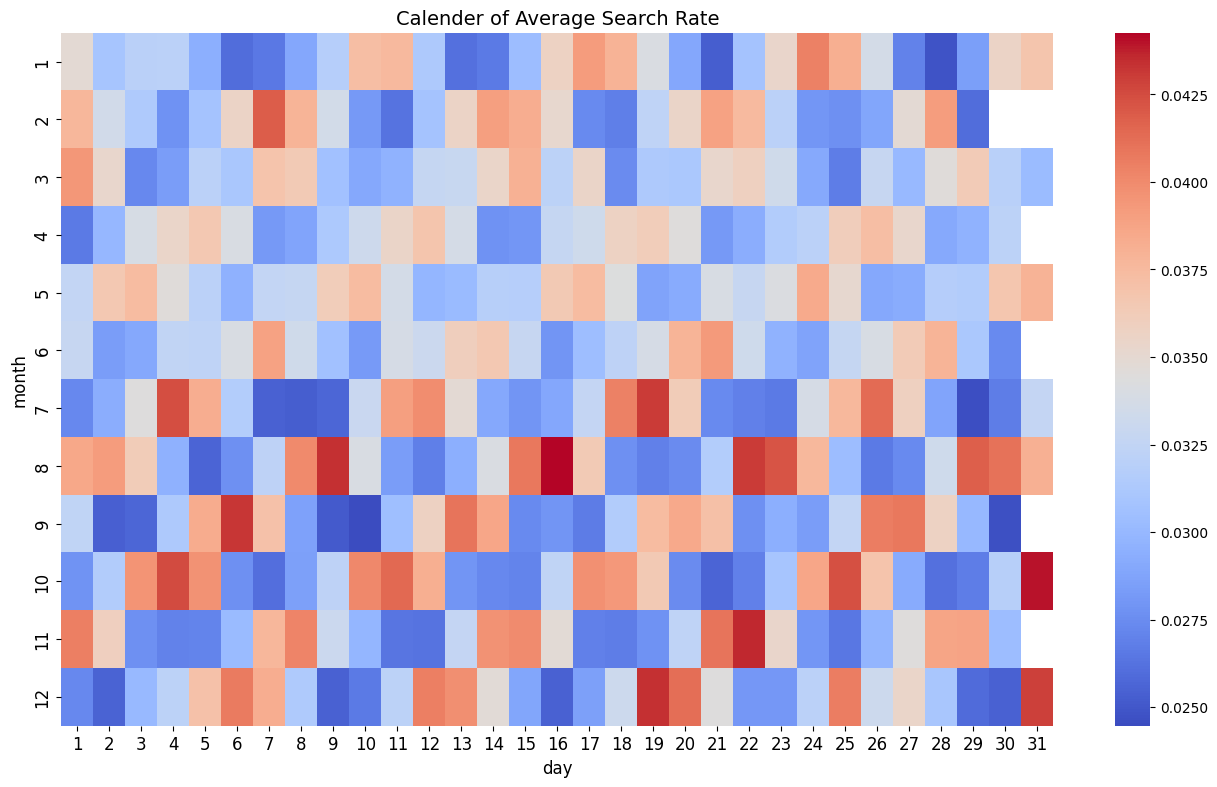

In [29]:
#計算每個日子的search_rate和arrest_rate
# 計算每個月的 count總數 以及 search 和 arrest 比例
day = cadf.groupby(['year','month','day']).agg({'search_conducted': 'sum','is_arrested':'sum' ,'stop_count': 'sum'}).reset_index()
day['search_rate'] = day['search_conducted']/day['stop_count']
day['arrest_rate'] = day['is_arrested']/day['stop_count']
day
#把每年相對應的天數的資料加起來取平均
day = day.groupby(['month','day']).agg({'search_rate': 'mean','arrest_rate':'mean'}).reset_index()
day
#把day畫成heatmap
daysr = day.pivot(index='month', columns='day', values='search_rate')
dayar = day.pivot(index='month', columns='day', values='arrest_rate')
sns.heatmap(daysr, cmap="coolwarm", linewidths=0.5, linewidth=0)
plt.title('Calender of Average Search Rate',fontsize = 14)
plt.xlabel('day', fontsize=12)
plt.ylabel('month', fontsize=12)
# 調整字體大小
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)




No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


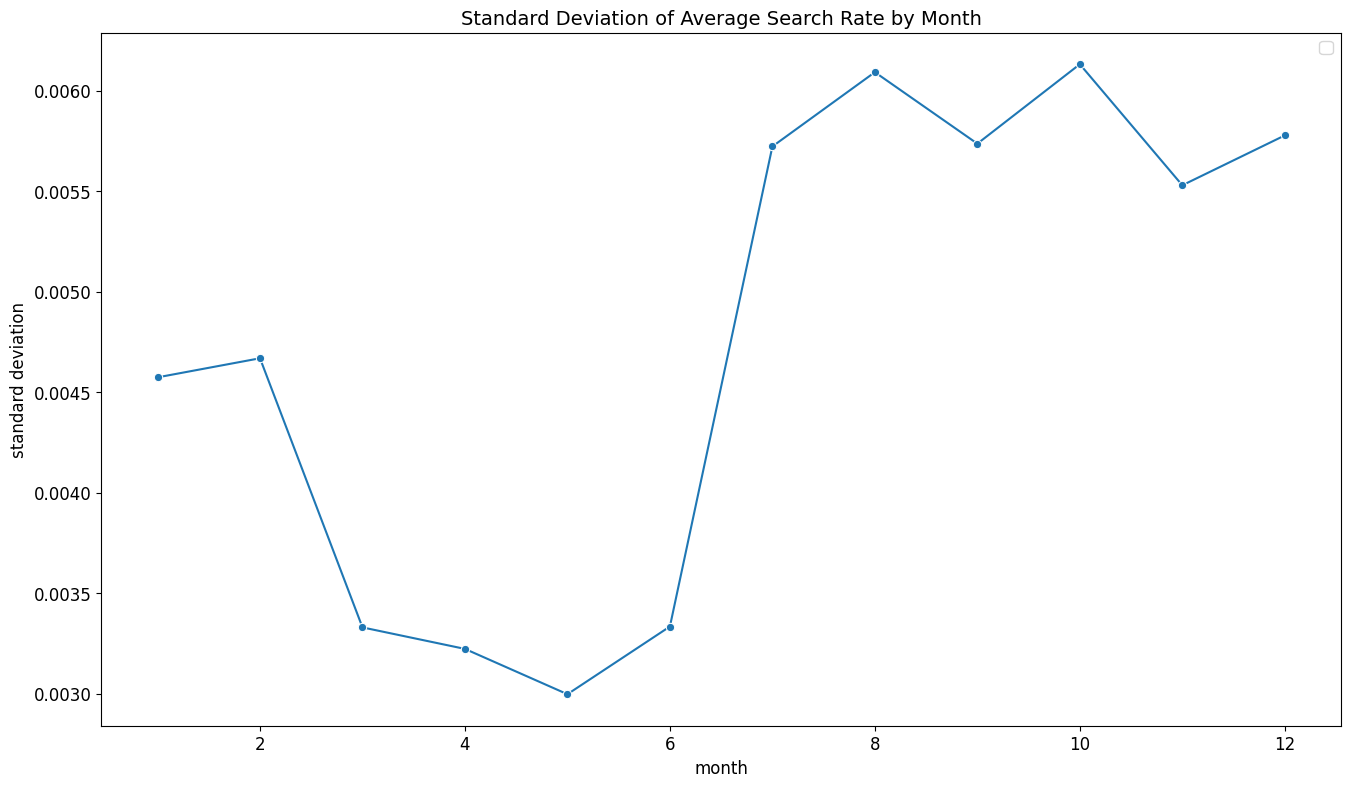

In [30]:
daysr.std(axis = 1)
#把每個月分的標準差畫成折線圖
sns.lineplot(data = daysr.std(axis = 1), marker='o')
plt.title('Standard Deviation of Average Search Rate by Month',fontsize = 14)
plt.xlabel('month', fontsize=12)
plt.ylabel('standard deviation', fontsize=12)
# 調整字體大小
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
# 調整圖例
plt.legend(fontsize=12)

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5]),
 [Text(0, 0.5, '1'),
  Text(0, 1.5, '2'),
  Text(0, 2.5, '3'),
  Text(0, 3.5, '4'),
  Text(0, 4.5, '5'),
  Text(0, 5.5, '6'),
  Text(0, 6.5, '7'),
  Text(0, 7.5, '8'),
  Text(0, 8.5, '9'),
  Text(0, 9.5, '10'),
  Text(0, 10.5, '11'),
  Text(0, 11.5, '12')])

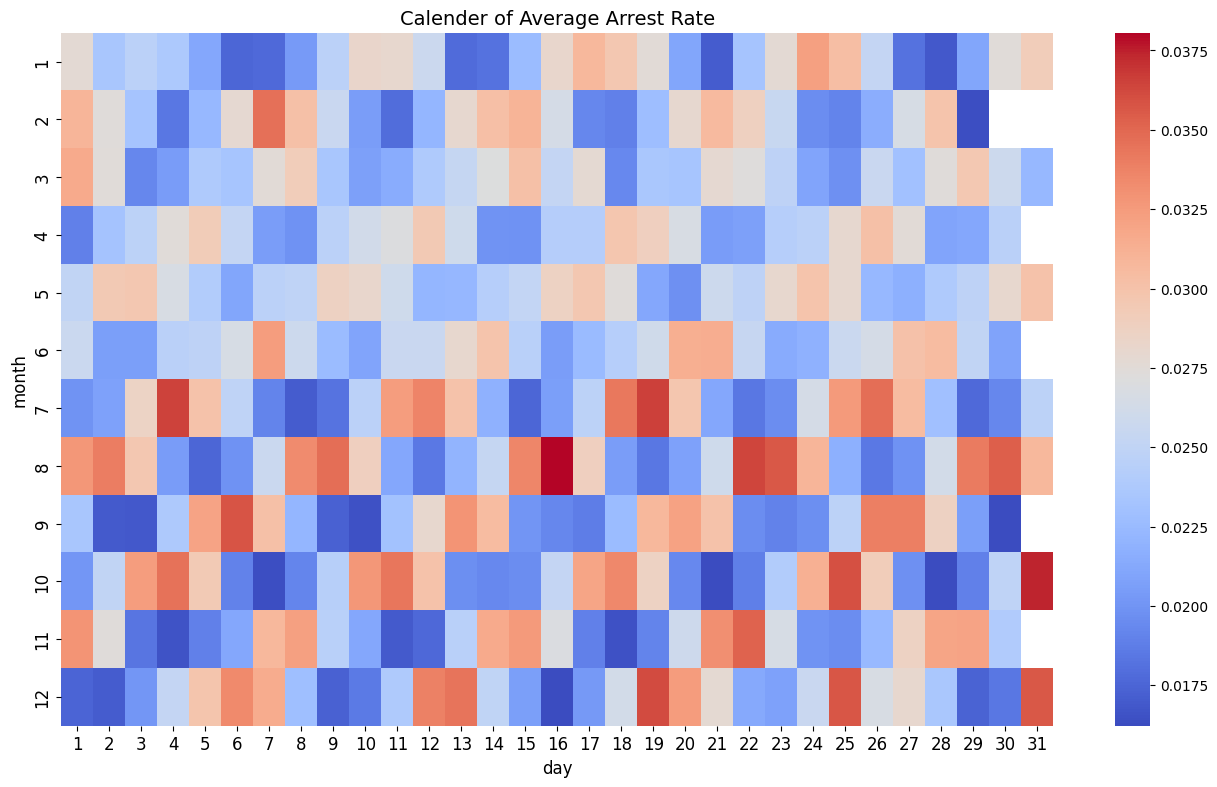

In [31]:
sns.heatmap(dayar, cmap="coolwarm", linewidths=0.5, linewidth=0)
plt.title('Calender of Average Arrest Rate',fontsize = 14)
plt.xlabel('day', fontsize=12)
plt.ylabel('month', fontsize=12)
# 調整字體大小
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

(array([0.0025, 0.003 , 0.0035, 0.004 , 0.0045, 0.005 , 0.0055, 0.006 ,
        0.0065, 0.007 ]),
 [Text(0, 0.0025, '0.0025'),
  Text(0, 0.003, '0.0030'),
  Text(0, 0.0035, '0.0035'),
  Text(0, 0.004, '0.0040'),
  Text(0, 0.0045000000000000005, '0.0045'),
  Text(0, 0.005, '0.0050'),
  Text(0, 0.0055, '0.0055'),
  Text(0, 0.006, '0.0060'),
  Text(0, 0.006500000000000001, '0.0065'),
  Text(0, 0.007000000000000001, '0.0070')])

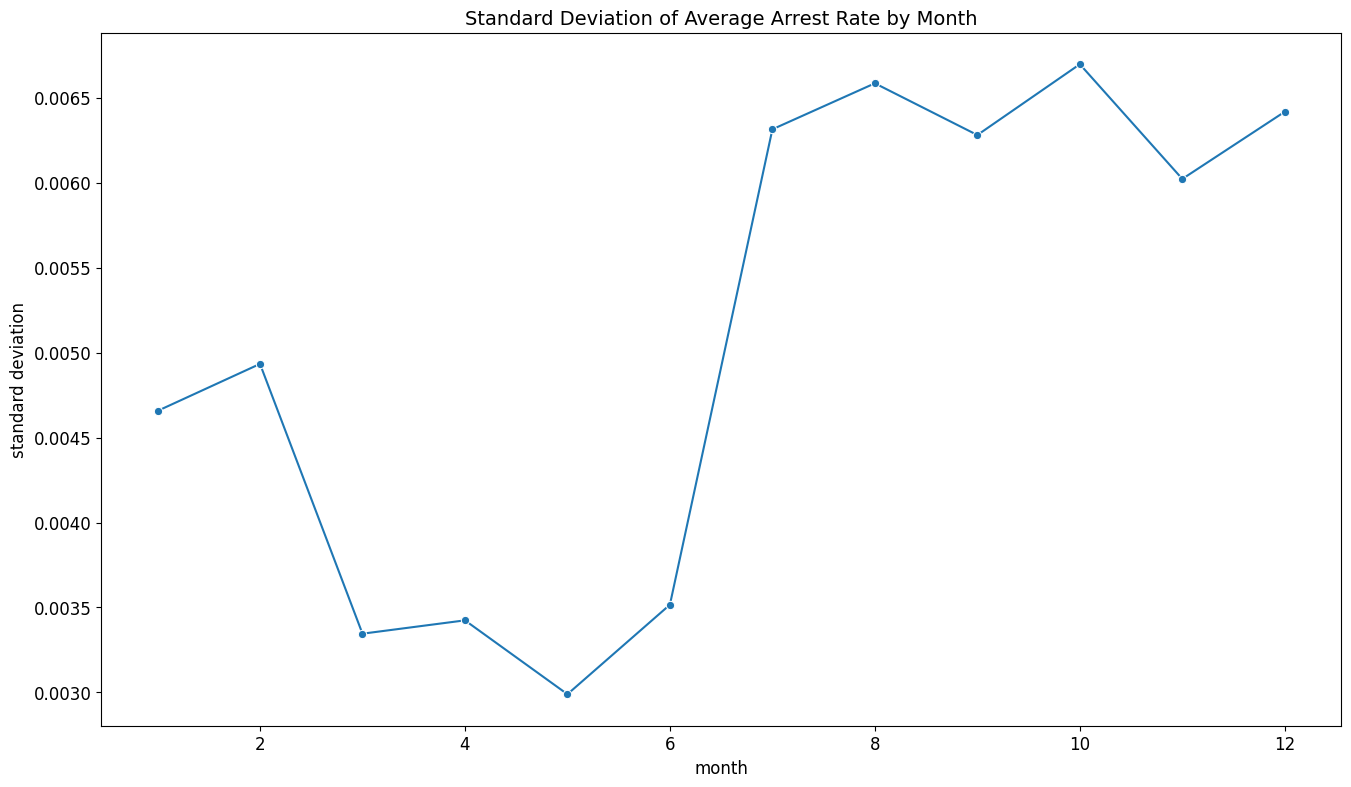

In [32]:
dayar.std(axis = 1)
#把每個月分的標準差畫成折線圖
sns.lineplot(data = dayar.std(axis = 1), marker='o')
plt.title('Standard Deviation of Average Arrest Rate by Month',fontsize = 14)
plt.xlabel('month', fontsize=12)
plt.ylabel('standard deviation', fontsize=12)
# 調整字體大小
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


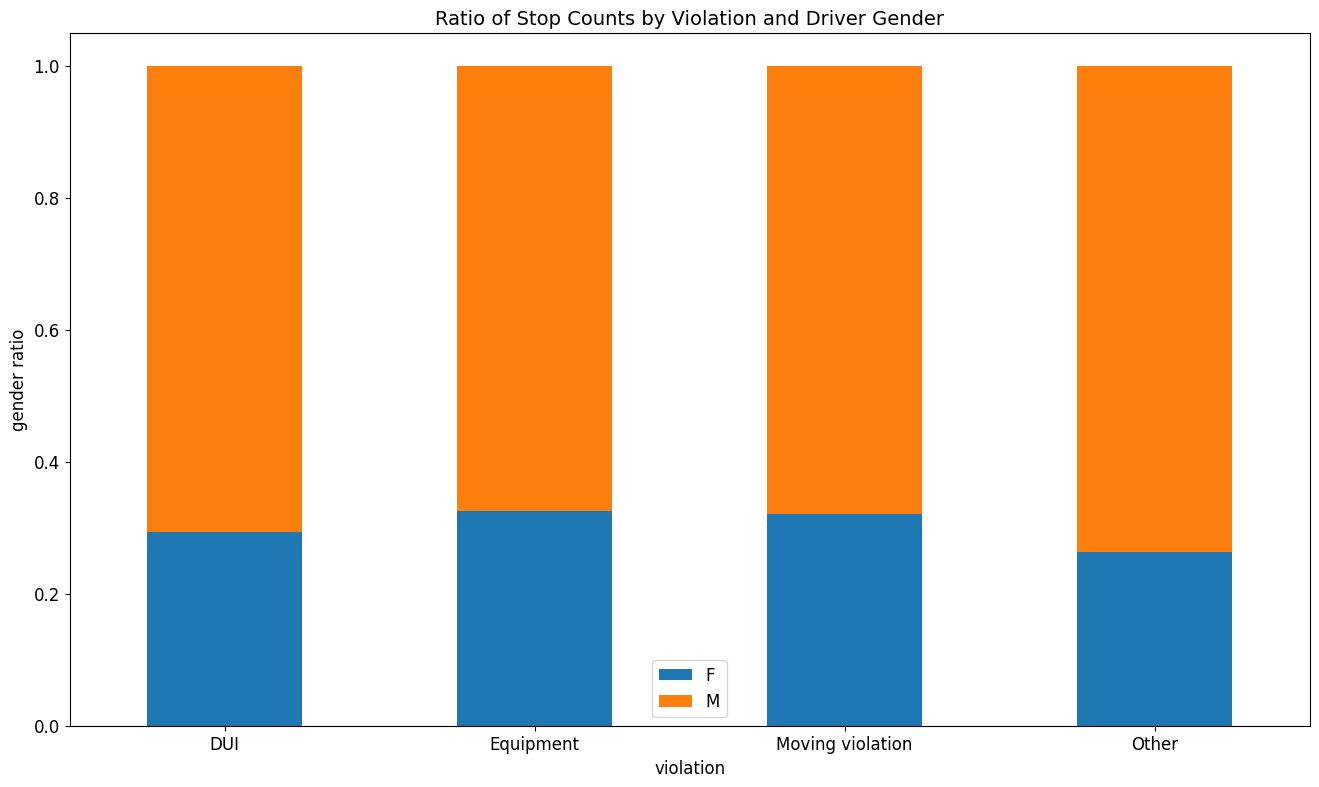

In [33]:
viosex = cadf.groupby(['violation','driver_gender'])['stop_count'].value_counts().reset_index(name = 'counts')

# 計算各個violation中，男女各占多少比例
viosex['total'] = viosex.groupby('violation')['counts'].transform('sum')
viosex['ratio'] = viosex['counts']/viosex['total']
del viosex['stop_count']

# # 調整vio['ratio']的格式
# viosex['ratio'] = viosex['ratio'].apply(lambda x: format(x, '.2%'))
viosex = viosex.pivot(index="violation", columns="driver_gender", values="ratio")
viosex.plot(kind='bar', stacked=True, rot=0)
plt.title("Ratio of Stop Counts by Violation and Driver Gender",fontsize = 14)
plt.xlabel('violation', fontsize=12)
plt.ylabel('gender ratio', fontsize=12)
# 調整字體大小
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)

In [34]:
cadf_county = cadf
cadf_county.dropna(inplace=True)

# 計算每個county的 count總數 以及 search 和 arrest 比例
county = cadf_county.groupby(['county_name']).agg({'search_conducted': 'sum','is_arrested':'sum' ,'stop_count': 'sum'}).reset_index()
county['search_rate'] = county['search_conducted']/county['stop_count']
county['arrest_rate'] = county['is_arrested']/county['stop_count']
#把county_name改成county
county.rename(columns={'county_name':'county'}, inplace=True)
county


,county,search_conducted,is_arrested,stop_count,search_rate,arrest_rate
0,Alameda County,27773,21759,834219,0.033292,0.026083
1,Alpine County,1298,1104,43413,0.029899,0.025430
2,Amador County,763,529,38521,0.019807,0.013733
3,Butte County,4207,3393,103566,0.040621,0.032762
4,Calaveras County,1096,912,36015,0.030432,0.025323
5,Colusa County,1115,664,47871,0.023292,0.013871
6,Contra Costa County,6189,5070,173356,0.035701,0.029246
7,Del Norte County,981,802,35058,0.027982,0.022876
8,El Dorado County,2811,2413,78010,0.036034,0.030932
9,Fresno County,14813,8439,269988,0.054865,0.031257


0.9364013924472563

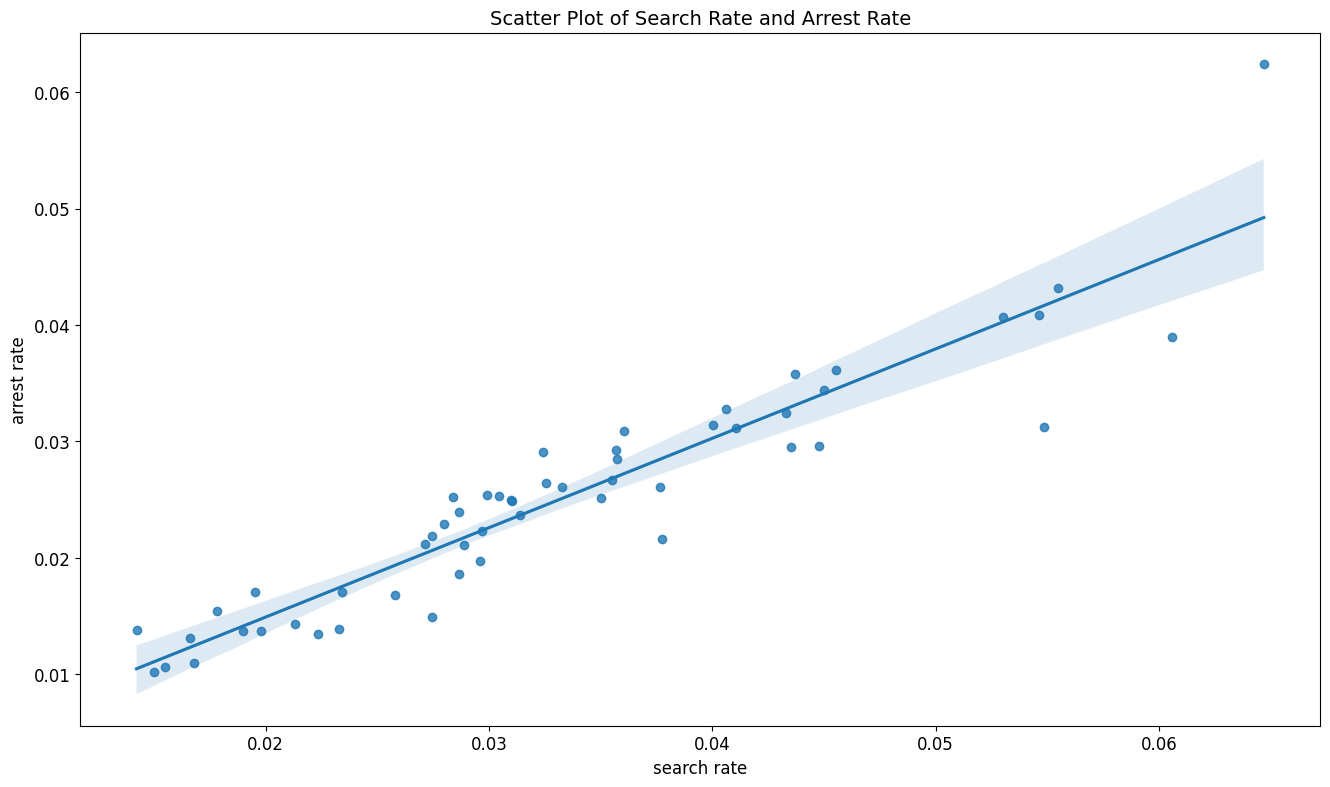

In [35]:
# 把每個county的search_rate和arrest_rate畫成散布圖
sns.regplot(x='search_rate', y='arrest_rate', data=county)
plt.title('Scatter Plot of Search Rate and Arrest Rate',fontsize = 14)
plt.xlabel('search rate', fontsize=12)
plt.ylabel('arrest rate', fontsize=12)
# 調整字體大小
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# 計算county的search_rate和arrest_rate的相關係數
county['search_rate'].corr(county['arrest_rate'])

In [36]:
# 計算violation下，各個driver_race的 count總數 以及 search 和 arrest 比例
viorace = cadf.groupby(['violation','driver_race']).agg({'search_conducted': 'sum','is_arrested':'sum' ,'stop_count': 'sum'}).reset_index()
viorace['search_rate'] = viorace['search_conducted']/viorace['stop_count']
viorace['arrest_rate'] = viorace['is_arrested']/viorace['stop_count']
# # 調整rate的格式
# viorace['search_rate'] = viorace['search_rate'].apply(lambda x: format(x, '.2%'))
# viorace['arrest_rate'] = viorace['arrest_rate'].apply(lambda x: format(x, '.2%'))
viorace



,violation,driver_race,search_conducted,is_arrested,stop_count,search_rate,arrest_rate
0,DUI,Asian,3127,3249,39198,0.079774,0.082887
1,DUI,Black,5458,5588,45001,0.121286,0.124175
2,DUI,Hispanic,28729,29183,159503,0.180116,0.182962
3,DUI,Other,2686,2770,33021,0.081342,0.083886
4,DUI,White,18491,19295,145440,0.127138,0.132666
5,Equipment,Asian,1898,1525,162264,0.011697,0.009398
6,Equipment,Black,10902,5406,274661,0.039693,0.019682
7,Equipment,Hispanic,33881,15454,933185,0.036307,0.016560
8,Equipment,Other,2925,1849,207452,0.014100,0.008913
9,Equipment,White,23723,14137,1128736,0.021017,0.012525


In [37]:
#新定義的
# 計算violation下，各個driver_race的 count總數 以及 search 和 arrest 比例
nviorace = cadf.groupby(['violation','driver_race']).agg({'search_conducted': 'sum','is_arrested':'sum' ,'stop_count': 'sum'}).reset_index()
nviorace['search_rate'] = nviorace['search_conducted']/nviorace['stop_count']
nviorace['arrest_rate'] = nviorace['is_arrested']/nviorace['search_conducted']
# # 調整rate的格式
# viorace['search_rate'] = viorace['search_rate'].apply(lambda x: format(x, '.2%'))
# viorace['arrest_rate'] = viorace['arrest_rate'].apply(lambda x: format(x, '.2%'))
nviorace

#
nviorace['directarrest_rate'] = (nviorace['is_arrested']-nviorace['search_conducted'])/nviorace['stop_count']
nviorace['directarrest_rate'] = nviorace['directarrest_rate'].apply(lambda x: format(x, '.2%'))
nviorace


,violation,driver_race,search_conducted,is_arrested,stop_count,search_rate,arrest_rate,directarrest_rate
0,DUI,Asian,3127,3249,39198,0.079774,1.039015,0.31%
1,DUI,Black,5458,5588,45001,0.121286,1.023818,0.29%
2,DUI,Hispanic,28729,29183,159503,0.180116,1.015803,0.28%
3,DUI,Other,2686,2770,33021,0.081342,1.031273,0.25%
4,DUI,White,18491,19295,145440,0.127138,1.043481,0.55%
5,Equipment,Asian,1898,1525,162264,0.011697,0.803477,-0.23%
6,Equipment,Black,10902,5406,274661,0.039693,0.495872,-2.00%
7,Equipment,Hispanic,33881,15454,933185,0.036307,0.456126,-1.97%
8,Equipment,Other,2925,1849,207452,0.014100,0.632137,-0.52%
9,Equipment,White,23723,14137,1128736,0.021017,0.595920,-0.85%


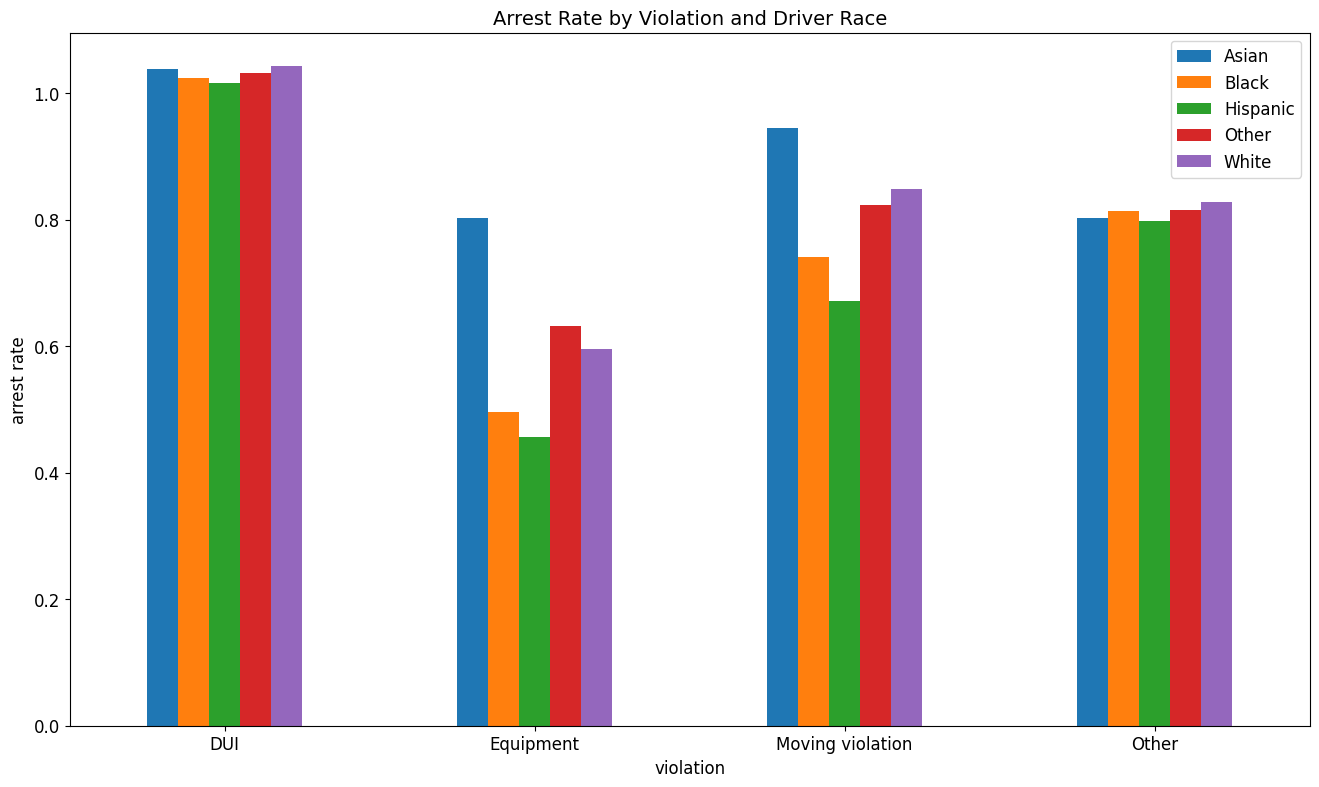

In [38]:
#新定義的
nvioracear = nviorace.pivot(index="violation", columns="driver_race", values="arrest_rate")
nvioracear.plot(kind='bar', rot=0)
plt.title("Arrest Rate by Violation and Driver Race",fontsize = 14)
plt.xlabel('violation', fontsize=12)
plt.ylabel('arrest rate', fontsize=12)
# 調整字體大小
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)

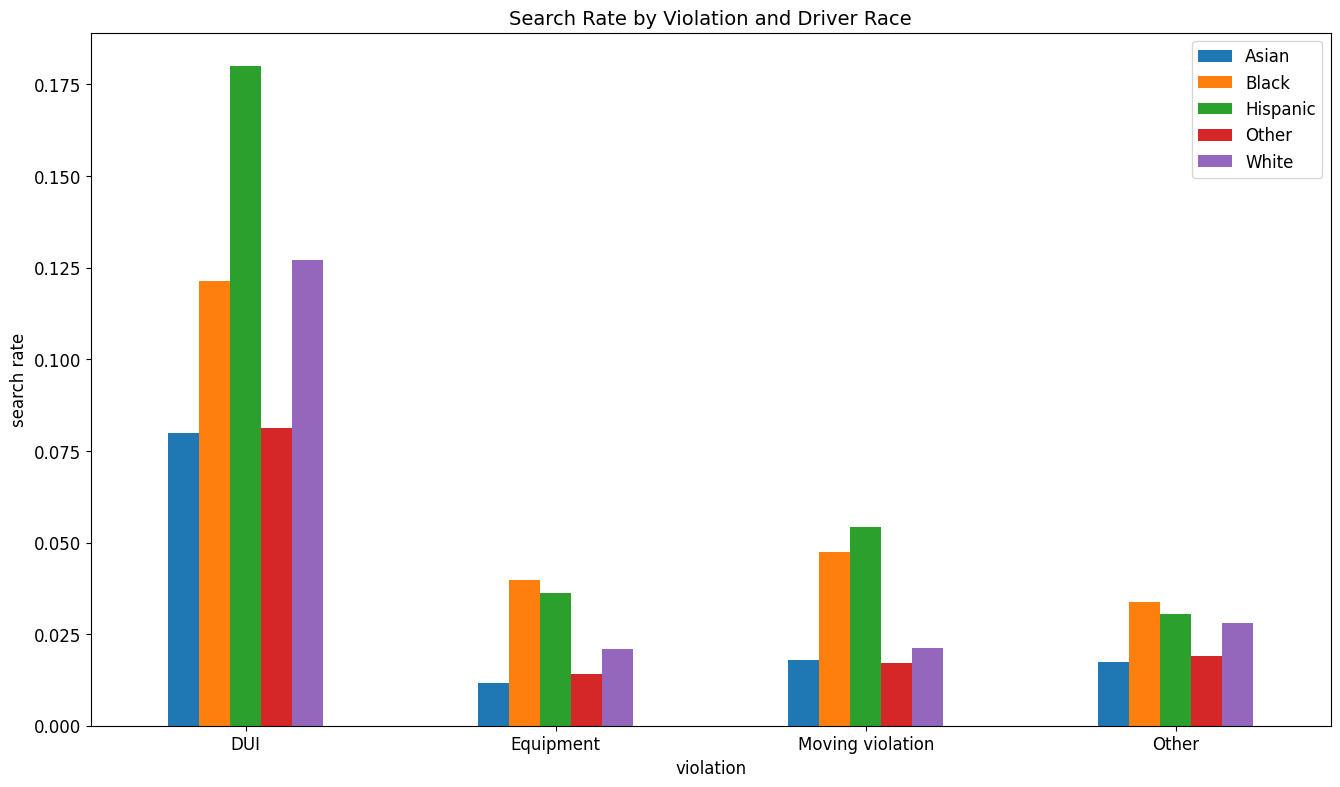

In [39]:
vioracesr = viorace.pivot(index="violation", columns="driver_race", values="search_rate")
vioracesr.plot(kind='bar', rot=0)
plt.title("Search Rate by Violation and Driver Race",fontsize = 14)
plt.xlabel('violation', fontsize=12)
plt.ylabel('search rate', fontsize=12)
# 調整字體大小
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)

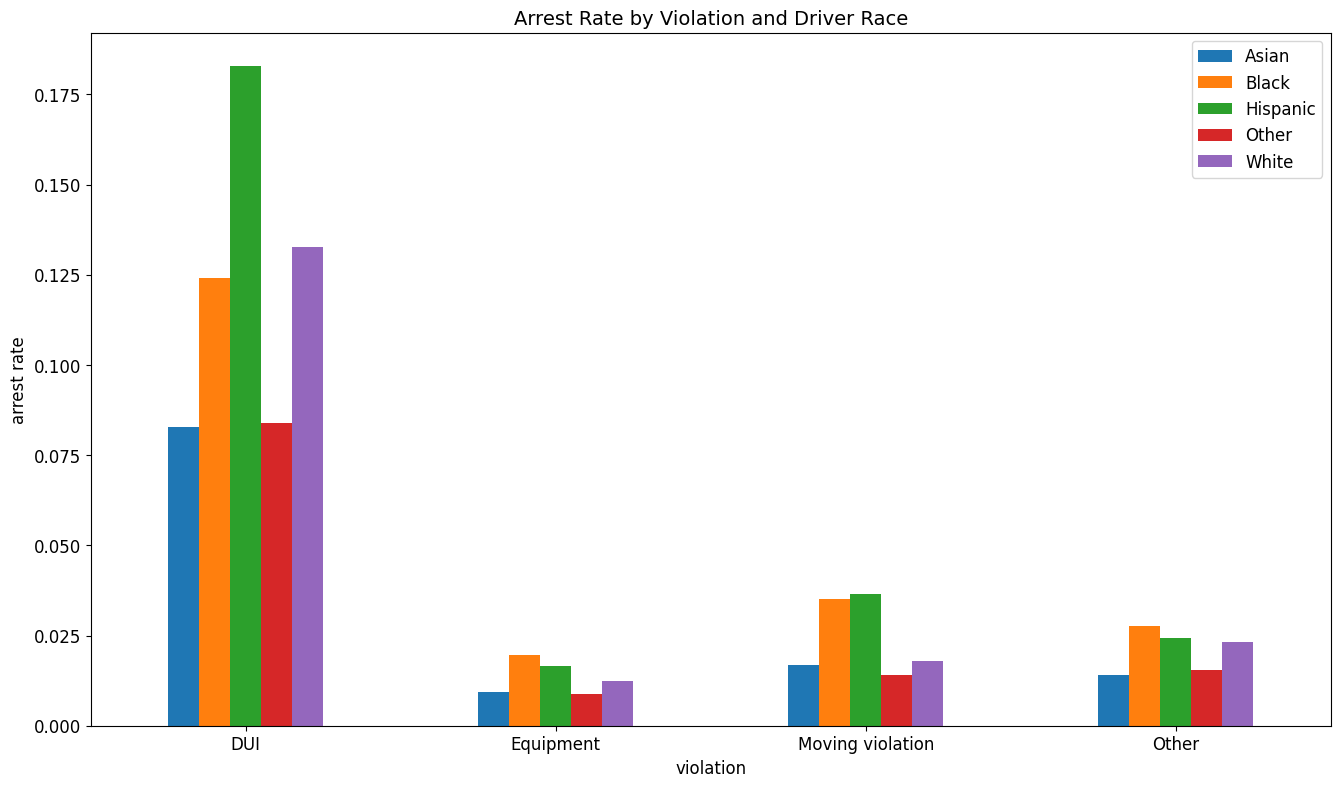

In [40]:
vioracear = viorace.pivot(index="violation", columns="driver_race", values="arrest_rate")
vioracear.plot(kind='bar', rot=0)
plt.title("Arrest Rate by Violation and Driver Race",fontsize = 14)
plt.xlabel('violation', fontsize=12)
plt.ylabel('arrest rate', fontsize=12)
# 調整字體大小
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)

In [41]:
# 新噌一個欄位['newrace']，把driver_race轉換成colored 跟 white
def newrace(x):
    if x == 'White':
        return 'white'
    elif x == 'Black' or x == 'Asian' or x == 'Hispanic' or x == 'Other':
        return 'colored'
    else:
        return 'missing'
cadf['newrace'] = cadf['driver_race'].apply(newrace)
# 計算violation下，各個newrace的 count總數 以及 search 和 arrest 比例
newviorace = cadf.groupby(['violation','newrace']).agg({'search_conducted': 'sum','is_arrested':'sum' ,'stop_count': 'sum'}).reset_index()
newviorace['search_rate'] = newviorace['search_conducted']/newviorace['stop_count']
newviorace['arrest_rate'] = newviorace['is_arrested']/newviorace['stop_count']
# 調整rate的格式
# newviorace['search_rate'] = newviorace['search_rate'].apply(lambda x: format(x, '.2%'))
# newviorace['arrest_rate'] = newviorace['arrest_rate'].apply(lambda x: format(x, '.2%'))
newviorace

,violation,newrace,search_conducted,is_arrested,stop_count,search_rate,arrest_rate
0,DUI,colored,40000,40790,276723,0.144549,0.147404
1,DUI,white,18491,19295,145440,0.127138,0.132666
2,Equipment,colored,49606,24234,1577562,0.031445,0.015362
3,Equipment,white,23723,14137,1128736,0.021017,0.012525
4,Moving violation,colored,129197,91676,3064552,0.042159,0.029915
5,Moving violation,white,50218,42653,2368884,0.021199,0.018006
6,Other,colored,80714,64731,2880815,0.028018,0.022470
7,Other,white,56789,47046,2017307,0.028151,0.023321


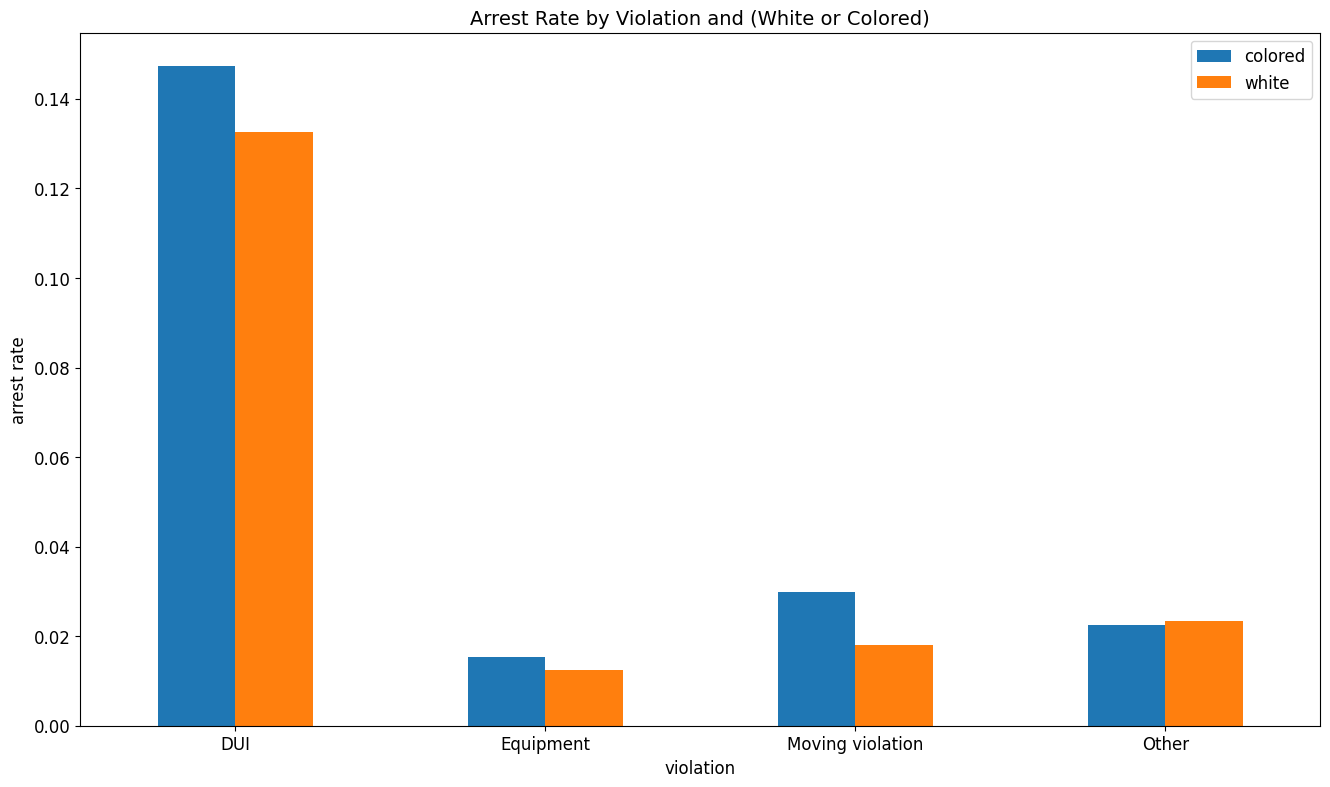

In [42]:
newvioracear = newviorace.pivot(index="violation", columns="newrace", values="arrest_rate")
newvioracear.plot(kind='bar', rot=0)
plt.title("Arrest Rate by Violation and (White or Colored)",fontsize = 14)
plt.xlabel('violation', fontsize=12)
plt.ylabel('arrest rate', fontsize=12)
# 調整字體大小
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)

In [43]:
import numpy as np
from scipy import stats

def get_p_value(arrA, arrB):

  a = np.array(arrA)
  b = np.array(arrB)

  t, p = stats.ttest_ind(a,b)

  return(p)

# if __name__ == "__main__":
#   get_p_value([1, 2, 3, 5, 6], [6, 7, 8, 9, 10])

brandnewviorace = newviorace[newviorace['violation']!= 'Other']
brandnewvioracear = brandnewviorace.pivot(index="violation", columns="newrace", values="arrest_rate")
brandnewvioracesr = brandnewviorace.pivot(index="violation", columns="newrace", values="search_rate")
#把newvioracear['white']和newvioracear['colored']的p-value算出來
print('ar_pvalue:',get_p_value(brandnewvioracear['white'], brandnewvioracear['colored']))
#把newvioracesr['white']和newvioracesr['colored']的p-value算出來
print('sr_pvalue:',get_p_value(brandnewvioracesr['white'], brandnewvioracesr['colored']))

  

ar_pvalue: 0.8721042443397511
sr_pvalue: 0.7634408288401184


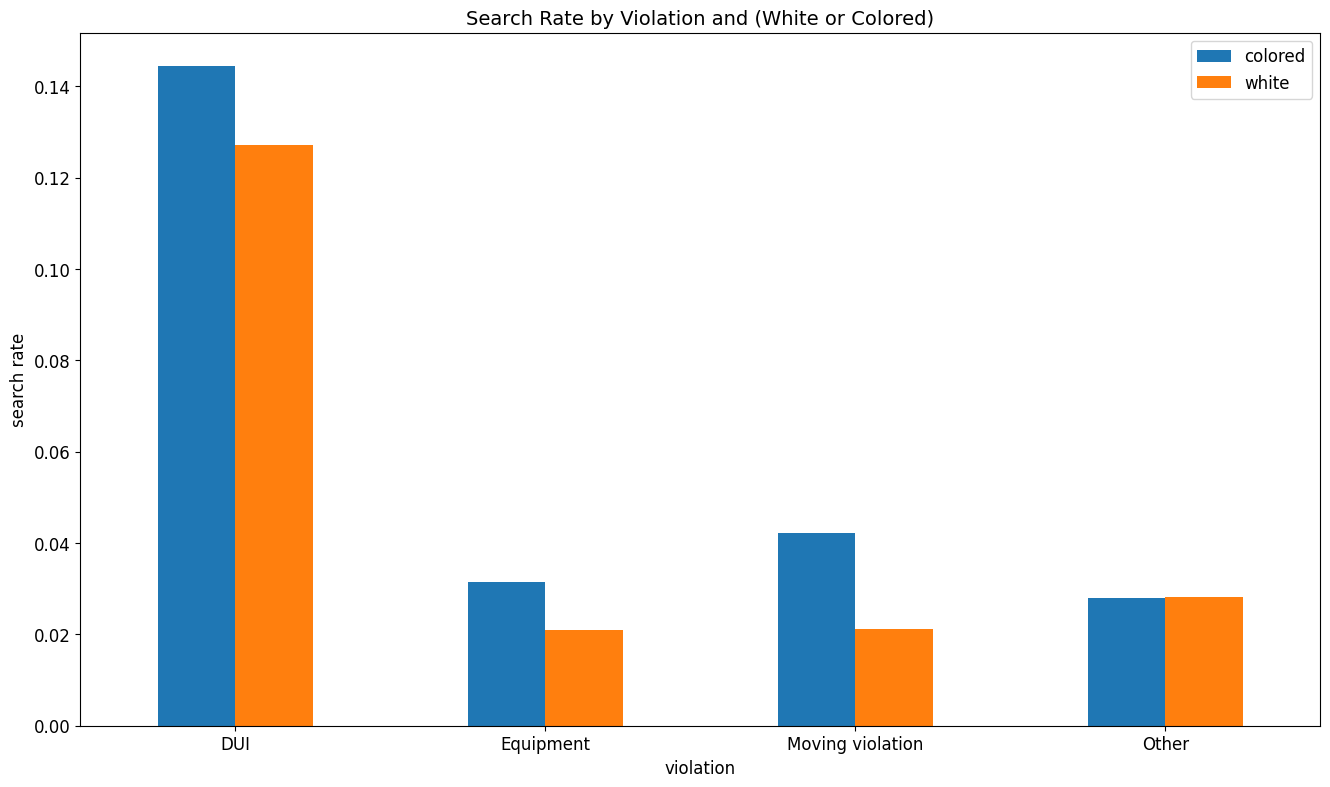

In [44]:
newvioracesr = newviorace.pivot(index="violation", columns="newrace", values="search_rate")
newvioracesr.plot(kind='bar', rot=0)
plt.title("Search Rate by Violation and (White or Colored)",fontsize = 14)
plt.xlabel('violation', fontsize=12)
plt.ylabel('search rate', fontsize=12)
# 調整字體大小
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)

In [45]:
newrace = cadf.groupby(['newrace']).agg({'search_conducted': 'sum','is_arrested':'sum' ,'stop_count': 'sum'}).reset_index()
newrace['search_rate'] = newrace['search_conducted']/newrace['stop_count']
newrace['arrest_rate'] = newrace['is_arrested']/newrace['stop_count']
# 調整rate的格式
newrace['search_rate'] = newrace['search_rate'].apply(lambda x: format(x, '.2%'))
newrace['arrest_rate'] = newrace['arrest_rate'].apply(lambda x: format(x, '.2%'))
newrace

,newrace,search_conducted,is_arrested,stop_count,search_rate,arrest_rate
0,colored,299517,221431,7799652,3.84%,2.84%
1,white,149221,123131,5660367,2.64%,2.18%


In [46]:
pop = pd.read_csv('./population13_16.csv', encoding='utf-8', index_col=False)
pop['county'] = pop['county'].str.replace(', California','')
pop['county'] = pop['county'].str.replace('.','')
pop = pop[['county','averagepop']]
pop 

,county,averagepop
0,Alameda County,"1,618,218"
1,Alpine County,"1,083"
2,Amador County,"36,952"
3,Butte County,"224,005"
4,Calaveras County,"44,903"
5,Colusa County,"21,288"
6,Contra Costa County,"1,115,988"
7,Del Norte County,"27,391"
8,El Dorado County,"183,784"
9,Fresno County,"964,600"


In [47]:
mpv = pd.read_csv('./Mapping Police Violence.csv', encoding='utf-8', index_col=False)
mpv

,name,age,gender,race,victim_image,date,street_address,city,state,zip,...,congressperson_party,prosecutor_head,prosecutor_race,prosecutor_gender,prosecutor_party,prosecutor_term,prosecutor_in_court,prosecutor_special,independent_investigation,prosecutor_url
0,Cameron Alan Eaton,33.0,Male,White,https://memorial-assets.frontrunnerpro.com/inc...,2023年11月7日,U.S. 431 and County Rd 22,Headland,AL,36862.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Jose Antonio Medina,58.0,Male,Hispanic,https://www.newsherald.com/gcdn/community-hub/...,2023年11月6日,Dunwoody Place,Wright,FL,32547.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Tranza Campbell,32.0,Male,Black,https://newscdn2.weigelbroadcasting.com/OAGzY-...,2023年11月6日,7300 block of South Dante Avenue,Chicago,IL,60619.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Noah Magallan,21.0,Male,White,https://cdn.tukioswebsites.com/obituary_profil...,2023年11月6日,9100 block of Akron Avenue,Lubbock,TX,79423.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Zachary Wolffscott,36.0,Male,Unknown race,NaN,2023年11月5日,I-80 at Elkhorn Blvd & Greenback Ln,Citrus Heights,CA,95673.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12334,Andrew L. Closson,21.0,Male,White,http://www.superiortelegram.com/sites/default/...,2013年1月1日,U.S. Highway 53,Gordon,WI,54838.0,...,Republican,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12335,Abel Gurrola,26.0,Male,Hispanic,http://www.bakersfieldnow.com/news/local/A-26-...,2013年1月1日,720 Terrace Way,Bakersfield,CA,93304.0,...,Republican,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12336,Andrew Layton,26.0,Male,White,http://bloximages.chicago2.vip.townnews.com/ma...,2013年1月1日,410 S Riverfront Drive,Mankato,MN,56001.0,...,Republican,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12337,Christopher Calhoun,38.0,Male,Unknown race,NaN,2012年6月29日,Oak Street SW and Lee Street SW,Atlanta,GA,30310.0,...,Democrat,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
from datetime import datetime
def date(x):
    datetime_format = "%Y年%m月%d日"
    chinese_date_datetime = datetime.strptime(x, datetime_format)
    return chinese_date_datetime
mpv['date'] = mpv['date'].apply(date)

# 取出mpv年份和月份
mpv['year'] = mpv['date'].dt.year
mpv['month'] = mpv['date'].dt.month
mpv['day'] = mpv['date'].dt.day

# 取出mpv中2013-2016年的資料
mpv = mpv[(mpv['year'] >= 2013) & (mpv['year'] <= 2016)]
mpv = mpv[mpv['state'] == 'CA']

# 調整county的格式 (在county後面加上county)
mpv['county'] = mpv['county'].apply(lambda x: x + ' County')
mpv

mpv['count']=1

Text(0.5, 1.0, 'Percentage of Different Race Killed by Police')

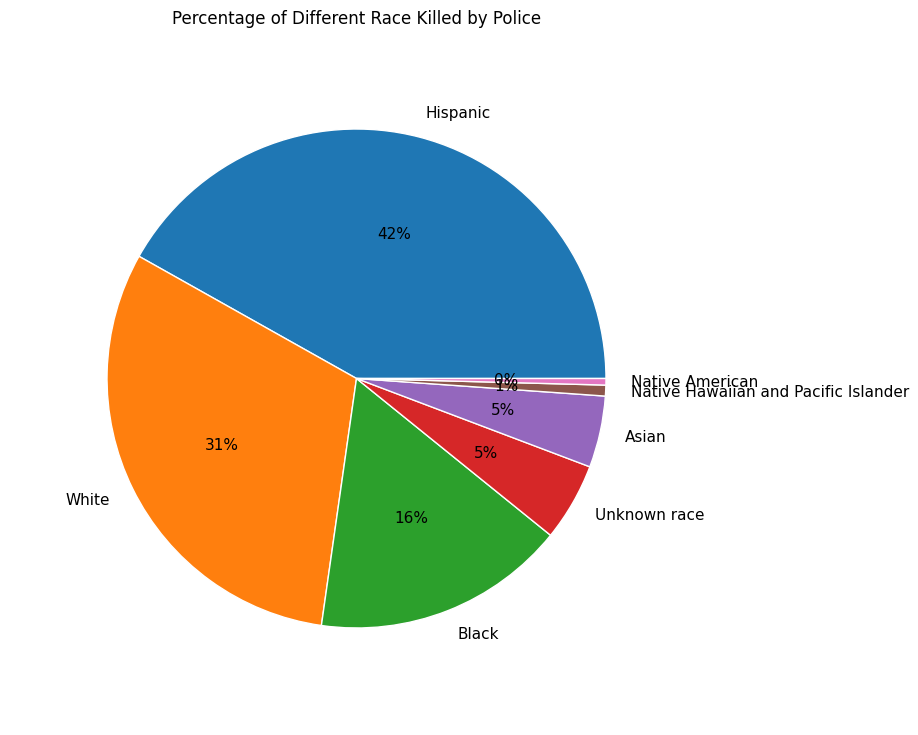

In [50]:
mpvrace = mpv['race'].value_counts().reset_index(name = 'counts')
mpvrace
#把mpvrace，繪製成pie chart
racepie = plt.pie(mpvrace['counts'],labels= mpvrace['race'], autopct='%1.0f%%', pctdistance=0.6,
                   labeldistance=1.1, radius=0.9, textprops={'fontsize': 11},
                   wedgeprops={'linewidth':1,'edgecolor':'w'})
plt.title('Percentage of Different Race Killed by Police')







In [51]:
# 計算每個county的killed量
countykilled = mpv['county'].value_counts().reset_index(name='counts')
countykilled.columns = ['county', 'killed']
# 把countykilled和pop合併
countykilled = pd.merge(pop, countykilled , on='county', how='left')
countykilled.fillna(0, inplace=True)
countykilled['averagepop'] = countykilled['averagepop'].apply(lambda x: int(x.replace(',', '')))
countykilled['killed_rate*100000'] = (countykilled['killed']/countykilled['averagepop'])*100000
countykilled


,county,averagepop,killed,killed_rate*100000
0,Alameda County,1618218,35.0,2.162873
1,Alpine County,1083,0.0,0.000000
2,Amador County,36952,0.0,0.000000
3,Butte County,224005,7.0,3.124930
4,Calaveras County,44903,0.0,0.000000
5,Colusa County,21288,0.0,0.000000
6,Contra Costa County,1115988,10.0,0.896067
7,Del Norte County,27391,0.0,0.000000
8,El Dorado County,183784,1.0,0.544117
9,Fresno County,964600,25.0,2.591748


In [52]:
#把countykilled和county合併
countysav = pd.merge(county, countykilled , on='county', how='left')
countysav = countysav[['county', 'search_rate', 'arrest_rate', 'killed_rate*100000']]
countysav


,county,search_rate,arrest_rate,killed_rate*100000
0,Alameda County,0.033292,0.026083,2.162873
1,Alpine County,0.029899,0.025430,0.000000
2,Amador County,0.019807,0.013733,0.000000
3,Butte County,0.040621,0.032762,3.124930
4,Calaveras County,0.030432,0.025323,0.000000
5,Colusa County,0.023292,0.013871,0.000000
6,Contra Costa County,0.035701,0.029246,0.896067
7,Del Norte County,0.027982,0.022876,0.000000
8,El Dorado County,0.036034,0.030932,0.544117
9,Fresno County,0.054865,0.031257,2.591748


In [53]:
countysav.sort_values(by=['killed_rate*100000'], ascending=False).head(5)

,county,search_rate,arrest_rate,killed_rate*100000
50,Trinity County,0.043279,0.032447,7.622532
31,Plumas County,0.028893,0.021067,5.361355
48,Sutter County,0.035511,0.026654,4.207116
14,Kern County,0.029583,0.019723,4.013688
43,Shasta County,0.029697,0.022282,3.920866


In [54]:
countysav.sort_values(by=['search_rate'], ascending=False).head(5)

,county,search_rate,arrest_rate,killed_rate*100000
16,Lake County,0.064686,0.062399,3.124951
51,Tulare County,0.060560,0.039003,2.192987
11,Humboldt County,0.055455,0.043206,3.701729
9,Fresno County,0.054865,0.031257,2.591748
38,San Joaquin County,0.054625,0.040876,0.000000


In [55]:
countysav.sort_values(by=['arrest_rate'], ascending=False).head(5)

,county,search_rate,arrest_rate,killed_rate*100000
16,Lake County,0.064686,0.062399,3.124951
11,Humboldt County,0.055455,0.043206,3.701729
38,San Joaquin County,0.054625,0.040876,0.000000
47,Stanislaus County,0.052990,0.040687,1.506640
51,Tulare County,0.060560,0.039003,2.192987


0.3081429393970969

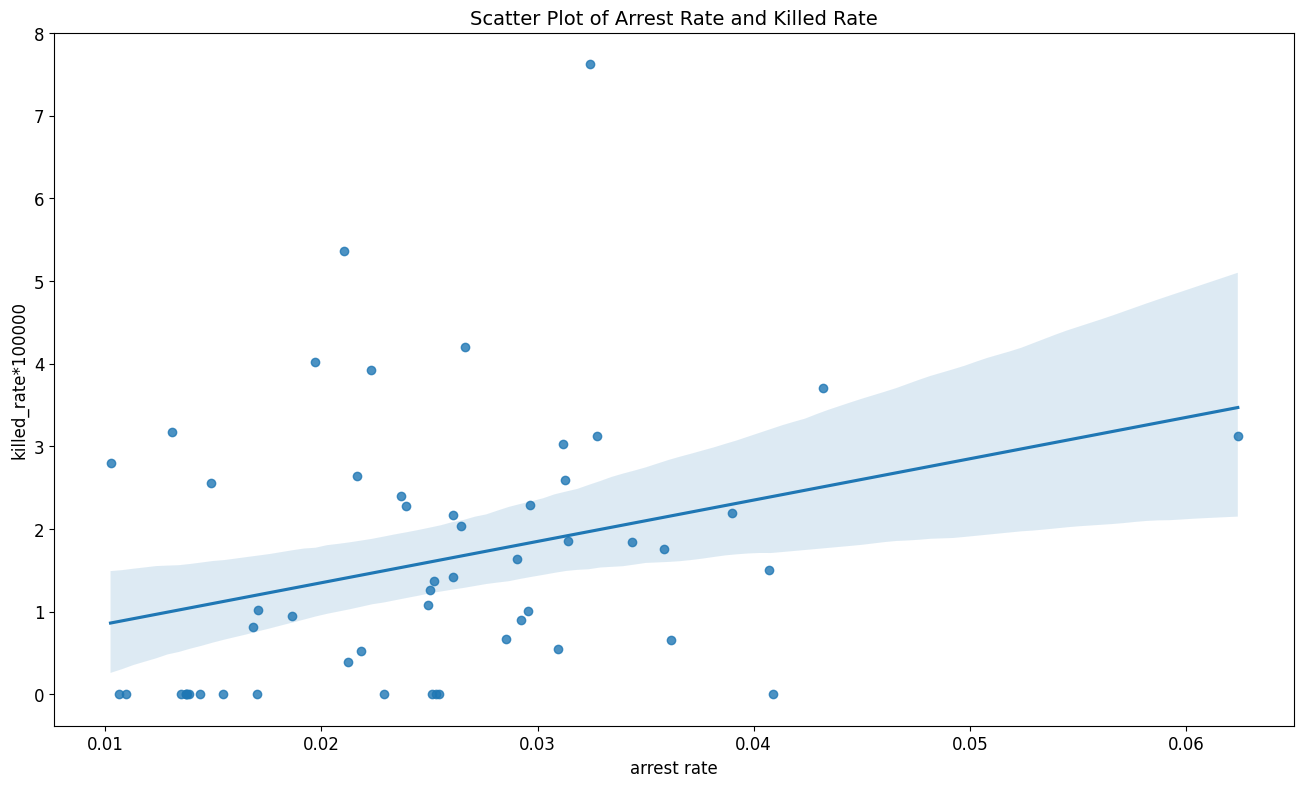

In [56]:
# 把county的search_rate和killed_rate*100000畫成散布圖
sns.regplot(x='arrest_rate', y='killed_rate*100000', data=countysav)
plt.title('Scatter Plot of Arrest Rate and Killed Rate',fontsize = 14)
plt.xlabel('arrest rate', fontsize=12)
plt.ylabel('killed_rate*100000', fontsize=12)
# 調整字體大小
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# 計算county的search_rate和killed_rate*100000的相關係數
countysav['arrest_rate'].corr(countysav['killed_rate*100000'])

0.35463453090491903

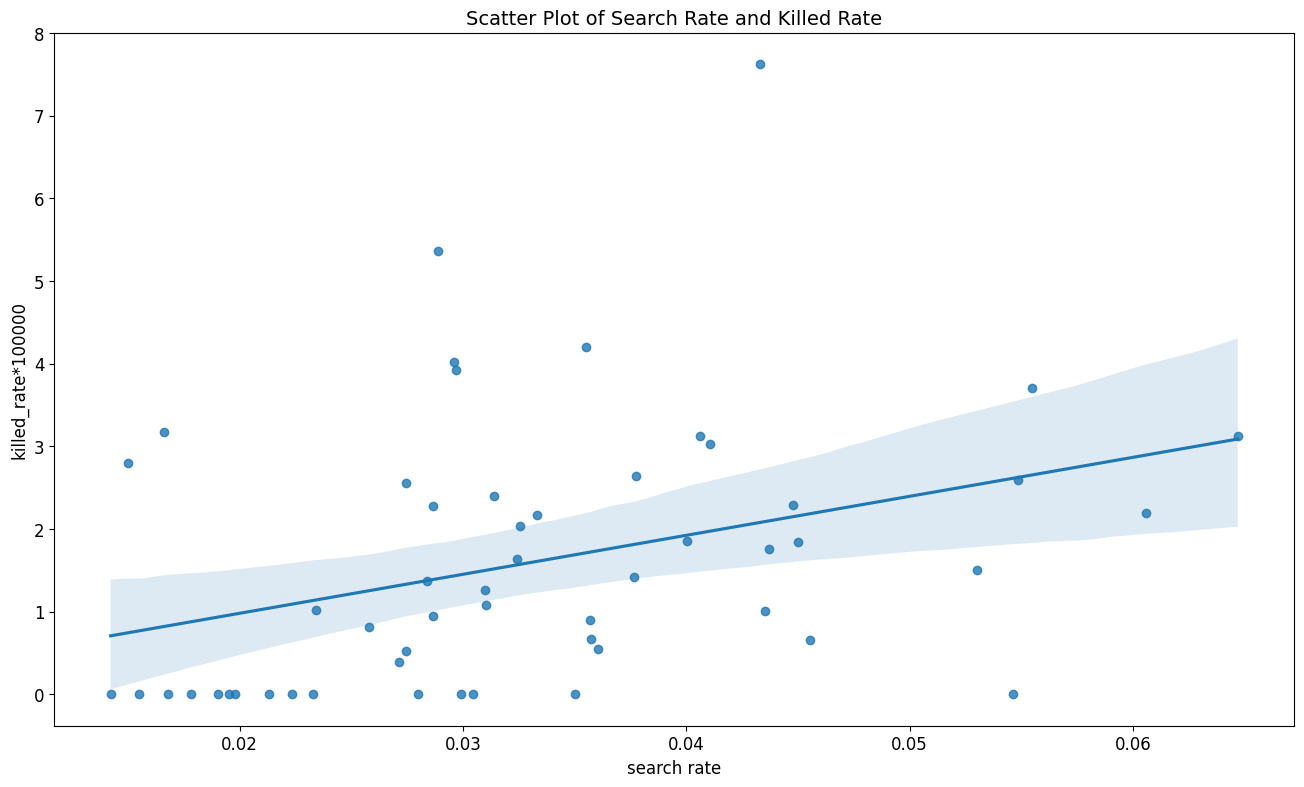

In [57]:
# 把county的search_rate和killed_rate*100000畫成散布圖
sns.regplot(x='search_rate', y='killed_rate*100000', data=countysav)
plt.title('Scatter Plot of Search Rate and Killed Rate',fontsize = 14)
plt.xlabel('search rate', fontsize=12)
plt.ylabel('killed_rate*100000', fontsize=12)
# 調整字體大小
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# 計算county的search_rate和killed_rate*100000的相關係數
countysav['search_rate'].corr(countysav['killed_rate*100000'])

In [58]:
trump = pd.read_csv('./trumpratio.csv', encoding='utf-8', index_col=False)
trump['county'] = trump['county'].apply(lambda x: x + ' County')
# 把trump的格式改成float
trump['trump'] = trump['trump'].apply(lambda x: float(x.replace('%', '')))
trump['trump'] = trump['trump']/100
trump
#把trump和countysav合併
countysavt = pd.merge(trump, countysav , on='county', how='right')
countysavt



,county,trump,search_rate,arrest_rate,killed_rate*100000
0,Alameda County,0.177,0.033292,0.026083,2.162873
1,Alpine County,0.329,0.029899,0.025430,0.000000
2,Amador County,0.609,0.019807,0.013733,0.000000
3,Butte County,0.477,0.040621,0.032762,3.124930
4,Calaveras County,0.608,0.030432,0.025323,0.000000
5,Colusa County,0.573,0.023292,0.013871,0.000000
6,Contra Costa County,0.263,0.035701,0.029246,0.896067
7,Del Norte County,0.564,0.027982,0.022876,0.000000
8,El Dorado County,0.532,0.036034,0.030932,0.544117
9,Fresno County,0.451,0.054865,0.031257,2.591748


0.38383203146786476

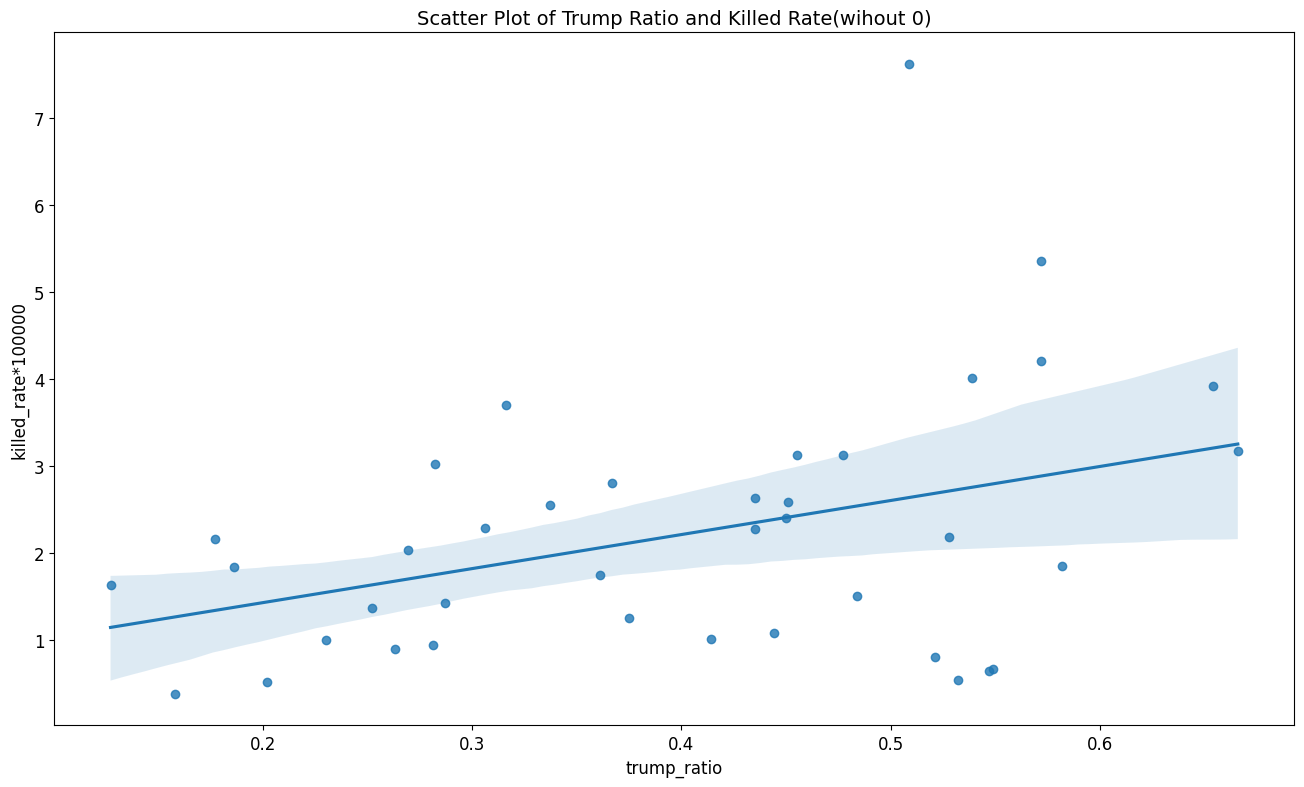

In [59]:
#把countysavt中資料為0的資料刪除
countysavt0 = countysavt[countysavt['killed_rate*100000'] != 0]
sns.regplot(x='trump', y='killed_rate*100000', data=countysavt0)
plt.title('Scatter Plot of Trump Ratio and Killed Rate(wihout 0)',fontsize = 14)
plt.xlabel('trump_ratio', fontsize=12)
plt.ylabel('killed_rate*100000', fontsize=12)
# 調整字體大小
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# 計算county的search_rate和killed_rate*100000的相關係數
countysavt0['trump'].corr(countysavt0['killed_rate*100000'])

In [60]:
import numpy as np
from scipy import stats

def get_p_value(arrA, arrB):

  a = np.array(arrA)
  b = np.array(arrB)

  t, p = stats.ttest_ind(a,b)

  return(p)

# if __name__ == "__main__":
#   get_p_value([1, 2, 3, 5, 6], [6, 7, 8, 9, 10])

#把newvioracear['white']和newvioracear['colored']的p-value算出來
print('krtr_pvalue:',get_p_value(countysavt['killed_rate*100000'], countysavt['trump']))

krtr_pvalue: 5.883428969122261e-07


-0.22718663324232782

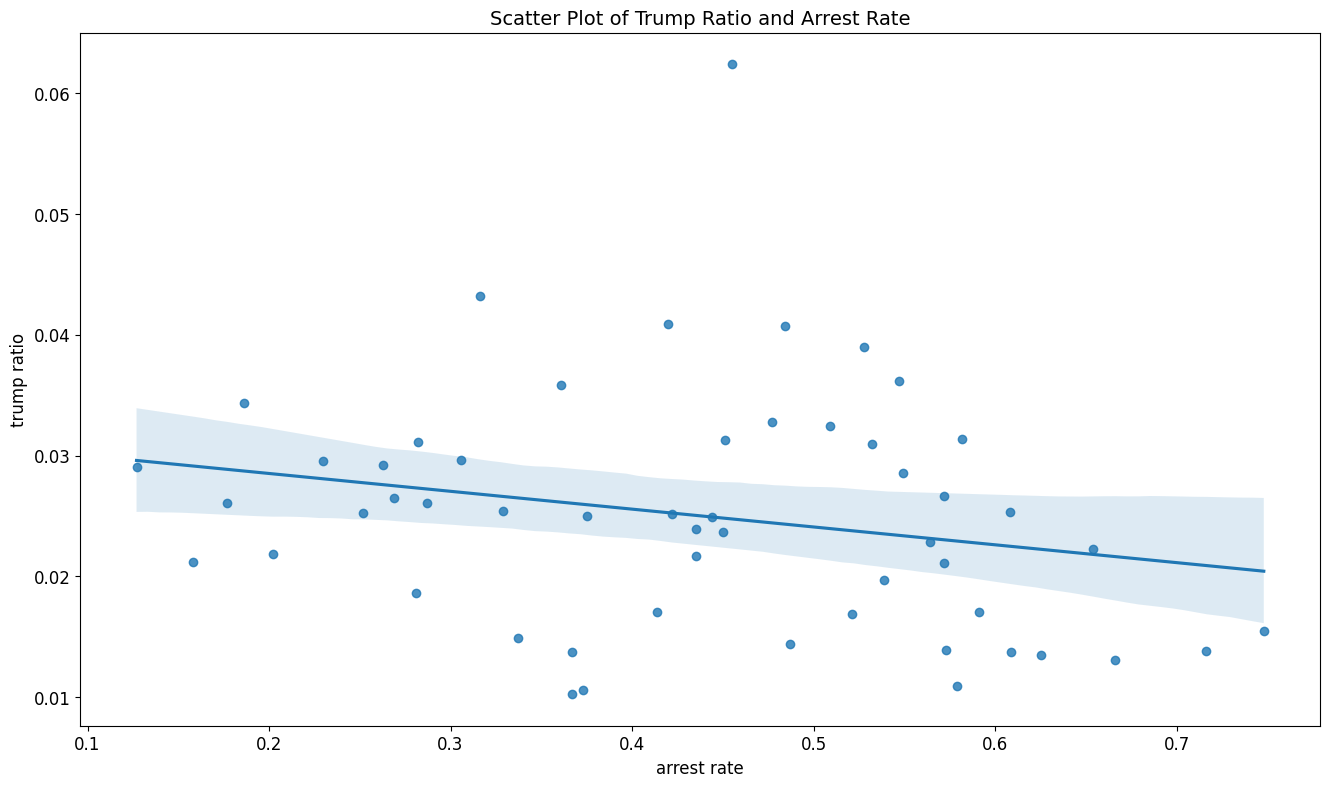

In [61]:
sns.regplot(x='trump', y='arrest_rate', data=countysavt)
plt.title('Scatter Plot of Trump Ratio and Arrest Rate',fontsize = 14)
plt.xlabel('arrest rate', fontsize=12)
plt.ylabel('trump ratio', fontsize=12)
# 調整字體大小
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# 計算county的search_rate和killed_rate*100000的相關係數
countysavt['arrest_rate'].corr(countysavt['trump'])

C:\Users\johnn\AppData\Local\Temp\ipykernel_5968\2358623668.py:10: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  Geoca_exploded = Geoca.explode()
c:\Users\johnn\AppData\Local\Programs\Python\Python311\Lib\site-packages\geoplot\geoplot.py:56: UserWarning: The data being passed to "hue" includes null values. You probably want to remove these before plotting this data with geoplot.
  warnings.warn(


Text(0.5, 1.0, 'Police Search Rate by County')

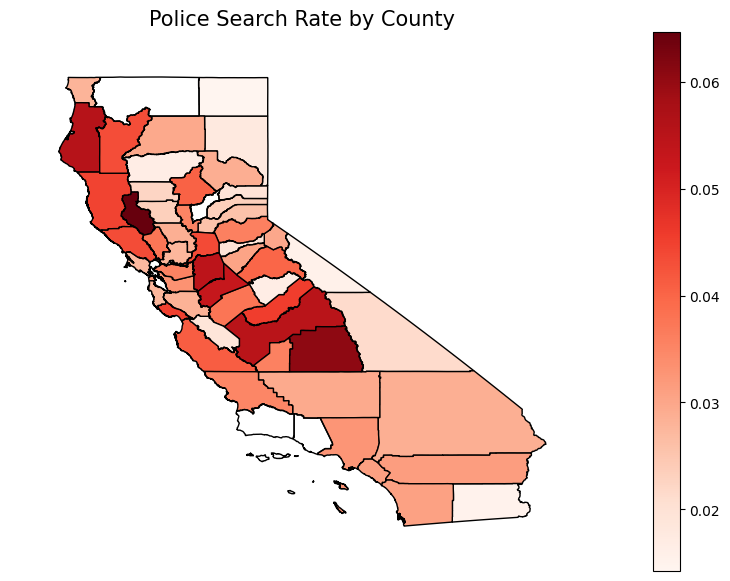

In [62]:
import geopandas as gpd
import geoplot
Geoca = gpd.read_file("California_County_Boundaries.geojson")
Geoca.head()

# 把CountyName改成county
Geoca.rename(columns={'CountyName':'county'}, inplace=True)
Geoca['county'] = Geoca['county'].apply(lambda x: x + ' County')
# 使用 explode 拆分 MultiPolygon
Geoca_exploded = Geoca.explode()
# 獨立df
search_rate = countysav[['county', 'search_rate']]
arrest_rate = countysav[['county', 'arrest_rate']]
killed_rate = countysav[['county', 'killed_rate*100000']]

# 把search_rate和geoca_exploded合併
del Geoca['OBJECTID']
search_rate = pd.merge(Geoca_exploded, search_rate , on='county', how='left')
arrest_rate = pd.merge(Geoca_exploded, arrest_rate , on='county', how='left')
killed_rate = pd.merge(Geoca_exploded, killed_rate , on='county', how='left')

# 繪製 choropleth 圖
geoplot.choropleth(search_rate, hue="search_rate", cmap="Reds", figsize=(15,7), legend=True)
import matplotlib.pyplot as plt
plt.title("Police Search Rate by County", fontdict={"fontsize": 15}, pad=5)

Text(0.5, 1.0, 'Police Arrest Rate by County')

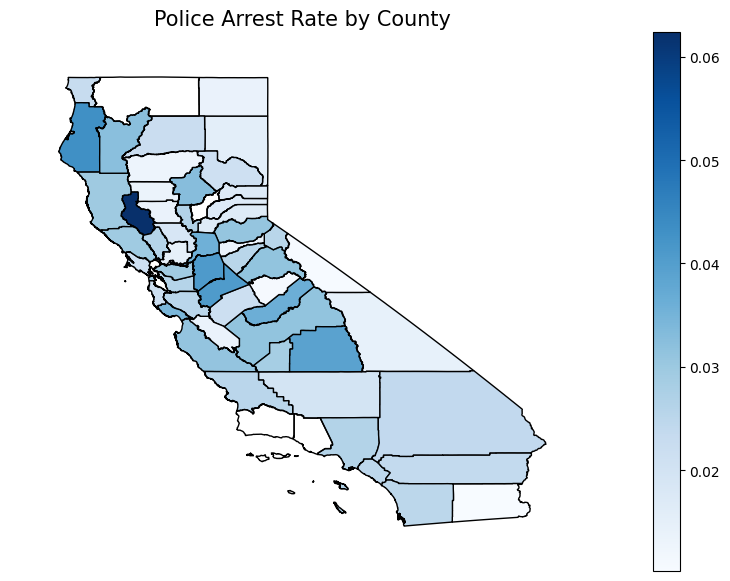

In [63]:
geoplot.choropleth(arrest_rate, hue="arrest_rate", cmap="Blues", figsize=(15,7), legend=True)
plt.title("Police Arrest Rate by County", fontdict={"fontsize": 15}, pad=5)

Text(0.5, 1.0, 'Police Killed Rate by County')

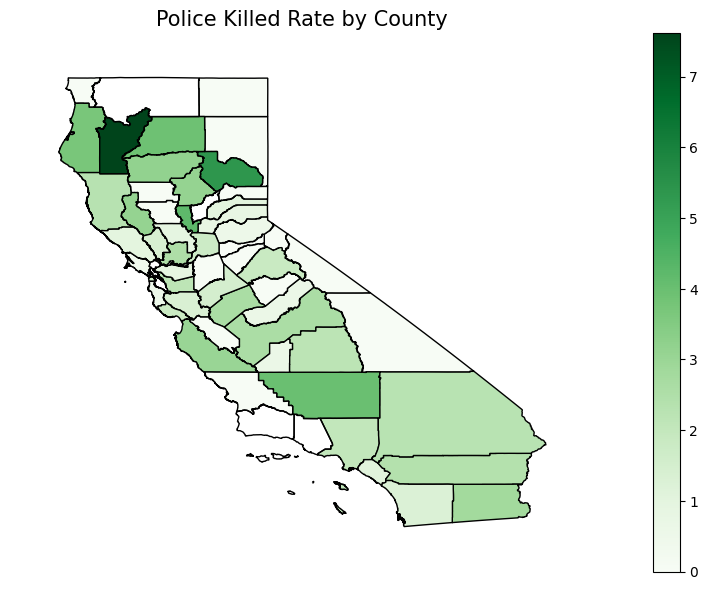

In [64]:
geoplot.choropleth(killed_rate, hue="killed_rate*100000", cmap="Greens", figsize=(15,7), legend=True)
plt.title("Police Killed Rate by County", fontdict={"fontsize": 15}, pad=5)